전체 샘플 엔트로피: 0.9402859586706311
기상 정보 게인: 0.24674981977443933
온도 정보 게인: 0.02922256565895487
습도 정보 게인: 0.15183550136234159
바람 정보 게인: 0.04812703040826949


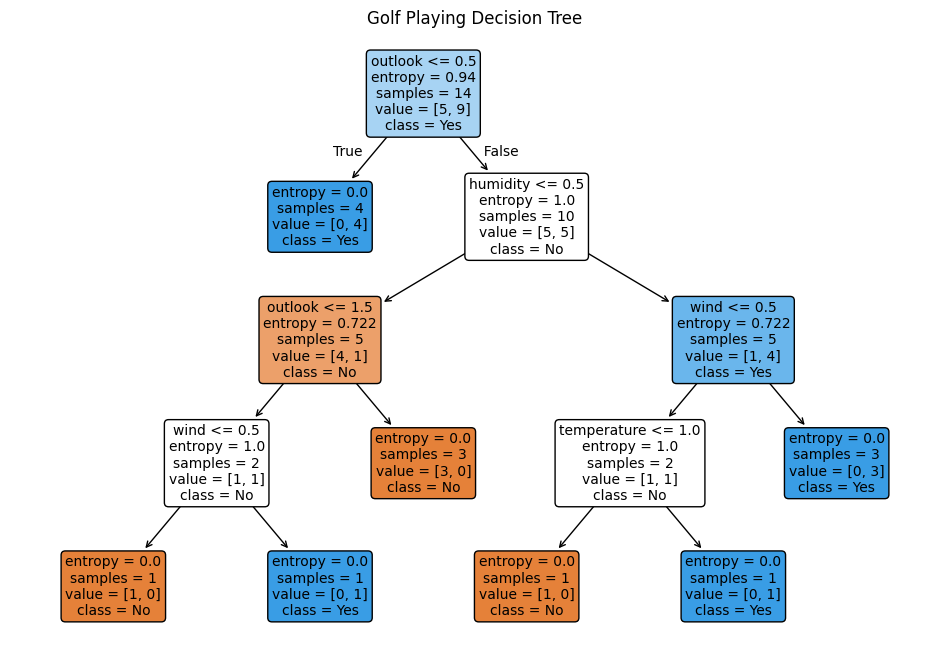

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

outlook = np.array([
    "Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast",
    "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"
])
temperature = np.array([
    "Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool",
    "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"
])
humidity = np.array([
    "High", "High", "High", "High", "Normal", "Normal", "Normal",
    "High", "Normal", "Normal", "Normal", "High", "Normal", "High"
])
wind = np.array([
    "Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong",
    "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"
])
play = np.array([
    "No", "No", "Yes", "Yes", "Yes", "No", "Yes",
    "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
])

y = np.where(play == "Yes", 1, 0)

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

def information_gain(parent_y, feature_column):
    H_parent = entropy(parent_y)
    values, counts = np.unique(feature_column, return_counts=True)
    total_count = parent_y.shape[0]
    weighted_child_entropy = 0.0
    for v, cnt in zip(values, counts):
        mask = (feature_column == v)
        y_v = parent_y[mask]
        H_v = entropy(y_v)
        weighted_child_entropy += (cnt / total_count) * H_v
    return H_parent - weighted_child_entropy

print("전체 샘플 엔트로피:", entropy(y))
print("기상 정보 게인:", information_gain(y, outlook))
print("온도 정보 게인:", information_gain(y, temperature))
print("습도 정보 게인:", information_gain(y, humidity))
print("바람 정보 게인:", information_gain(y, wind))

# 정수 맵핑 테이블 생성
le_outlook = LabelEncoder().fit(outlook)
le_temperature = LabelEncoder().fit(temperature)
le_humidity = LabelEncoder().fit(humidity)
le_wind = LabelEncoder().fit(wind)

# 정수로 데이터 변환
X_outlook = le_outlook.transform(outlook)
X_temperature = le_temperature.transform(temperature)
X_humidity = le_humidity.transform(humidity)
X_wind = le_wind.transform(wind)
X = np.column_stack([X_outlook, X_temperature, X_humidity, X_wind])

clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=["outlook", "temperature", "humidity", "wind"],
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Golf Playing Decision Tree")
plt.show()

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    2   2            2   25.355     5
1   47    1   1            2   13.093     3
2   47    1   1            2   10.114     3
3   28    2   0            2    7.798     4
4   61    2   1            2   18.043     5


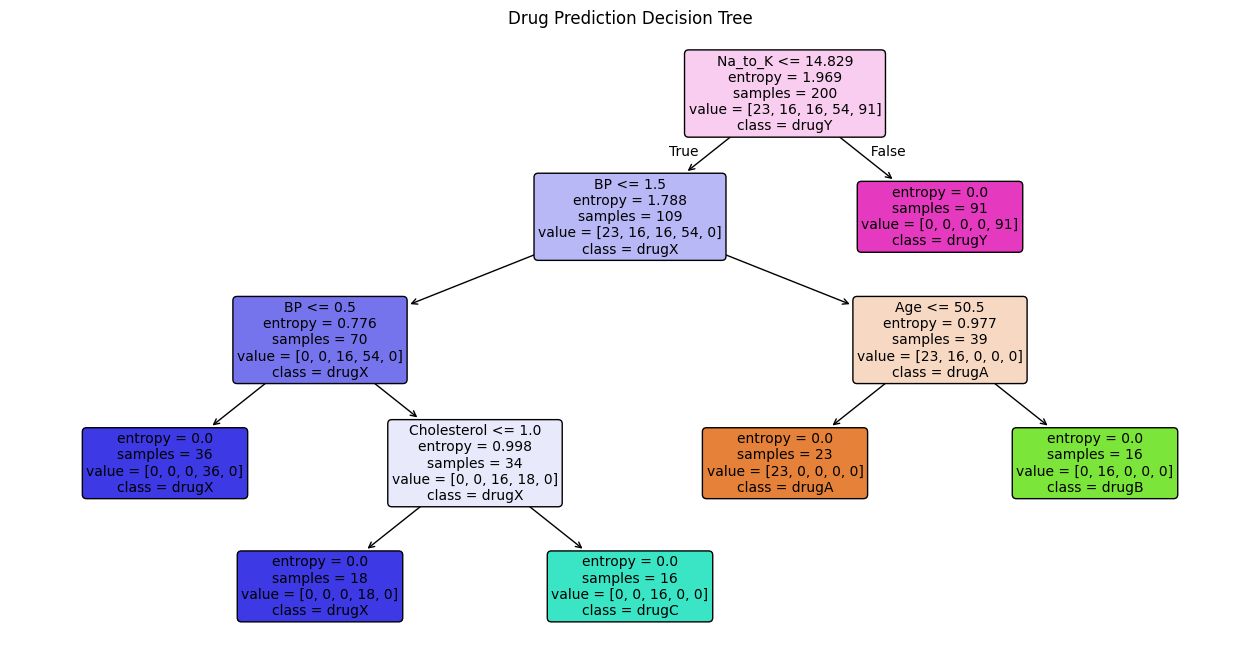

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from google.colab import drive

local = "/content/drive/MyDrive/머신러닝 실습/데이터/drug200.csv"

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

df = pd.read_csv(local)
df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})
print(df.head())

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

plt.figure(figsize=(16, 8))
plot_tree(
    clf,
    feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
    class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Drug Prediction Decision Tree")
plt.show()